# DAT210x - Programming with Python for DS

## Module4- Lab5

In [47]:
import pandas as pd

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [48]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [49]:
samples = []

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [50]:
import os

for file in os.listdir('Datasets/ALOI/32'):
    a = os.path.join('Datasets/ALOI/32', file)
    img = misc.imread(a).reshape(-1)
    samples.append(img)
print(len(samples))

72


Convert `samples` to a DataFrame named `df`:

In [51]:
df = pd.DataFrame(samples)
df

,0,1,2,3,4,5,6,7,8,9,...,27638,27639,27640,27641,27642,27643,27644,27645,27646,27647
0,4,4,4,3,3,3,3,3,3,3,...,12,13,13,13,12,12,12,12,12,7
1,4,4,4,3,4,4,3,3,4,4,...,12,13,13,13,12,13,12,13,13,7
2,4,4,4,4,4,4,4,4,4,4,...,12,12,12,12,12,12,11,12,11,6
3,4,4,4,4,4,4,4,4,4,4,...,11,11,11,12,12,11,12,12,11,7
4,4,4,4,4,4,4,4,4,4,4,...,11,11,12,12,11,11,11,11,11,6
5,4,4,4,4,4,4,4,4,4,4,...,11,11,11,11,11,11,12,11,10,6
6,4,4,4,4,4,4,4,4,4,4,...,12,12,12,12,13,12,11,11,11,6
7,4,4,4,4,4,4,4,4,4,4,...,11,11,11,12,12,11,12,12,11,6
8,4,4,4,4,4,4,4,4,4,4,...,11,11,12,12,11,11,11,11,11,6
9,4,4,4,4,4,4,4,4,4,4,...,11,11,11,11,11,11,11,11,11,6


Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [52]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors = 6, n_components = 3)
T = iso.fit_transform(df)

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

In [53]:
def Plot2D(T, title, x, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.', c = colors, alpha=0.7)

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

In [54]:
def Plot3D(T, title, x, y, z):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  ax.set_zlabel('Component: {0}'.format(z))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  z_size = (max(T[:,z]) - min(T[:,z])) * 0.08
  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y],T[:,z], marker='.', c = colors, alpha=0.65)

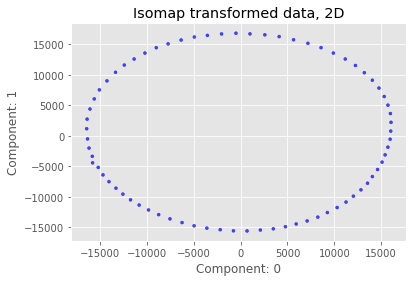

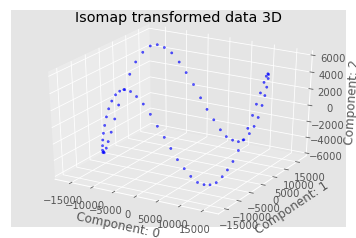

In [55]:
Plot2D(T, "Isomap transformed data, 2D", 0, 1)
Plot3D(T, "Isomap transformed data 3D", 0, 1, 2)
plt.show()

Answer the first two lab questions!

Create another for loop. This time it should iterate over all the images in the `Datasets/ALOI/32_i` directory. Just like last time, load up each image, process them the way you did previously, and append them into your existing `samples` list:

In [56]:
for file1 in os.listdir('Datasets/ALOI/32i'):
    b = os.path.join('Datasets/ALOI/32i', file1)
    img1 = misc.imread(b).reshape(-1)
    samples.append(img1)

colors = []
for i in range(72):
    colors.append('b')
for j in range(12):
    colors.append('r')

Convert `samples` to a DataFrame named `df`:

In [57]:
df = pd.DataFrame(samples)

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [58]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors = 6, n_components = 3)
T = iso.fit_transform(df)

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

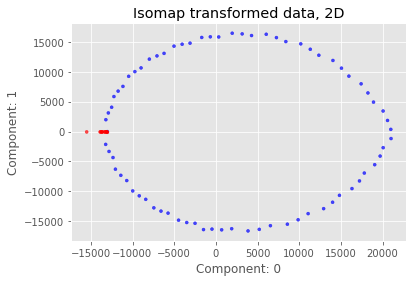

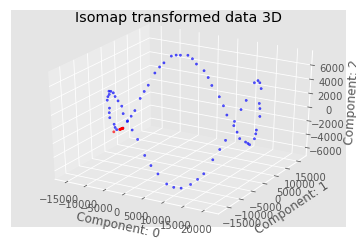

In [59]:
Plot2D(T, "Isomap transformed data, 2D", 0, 1)
Plot3D(T, "Isomap transformed data 3D", 0, 1, 2)
plt.show()

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

In [ ]:
# .. your code here ..